<a href="https://colab.research.google.com/github/Shreeramunni/Shreeram/blob/master/gender_detection_cvlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gender Detection with cvlib

In [0]:
!pip install cvlib opencv-python

     |████████████████████████████████| 10.0MB 4.2MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.3-cp36-none-any.whl size=10043491 sha256=a4c6c3a0b1c1b5e6e5d7cbdca79d2b5acdbfe951d45e79fbe057bbfd8bcba516
  Stored in directory: /root/.cache/pip/wheels/c9/83/ca/701a48deacbc78758f33173252feb97297316c40af783264e2
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12073 sha256=bed769bea6e9687cf7370282772da22c92b256a8fa7d5321426428b897e814a3
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [0]:
import cv2
import cvlib as cv
from google.colab.patches import cv2_imshow
import numpy as np

In [0]:
!wget https://raw.githubusercontent.com/arunponnusamy/cvlib/master/examples/images/gender_detection_input.jpg -O gender.jpg

--2020-01-19 09:54:50--  https://raw.githubusercontent.com/arunponnusamy/cvlib/master/examples/images/gender_detection_input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 406110 (397K) [image/jpeg]
Saving to: ‘gender.jpg’

gender.jpg          100%[===================>] 396.59K  --.-KB/s    in 0.05s   

2020-01-19 09:54:50 (8.56 MB/s) - ‘gender.jpg’ saved [406110/406110]



In [0]:
img = cv2.imread('gender.jpg')

In [0]:
face, conf = cv.detect_face(img)
print(face, conf)

[[534, 83, 639, 237], [216, 67, 315, 212]] [0.99978215, 0.99611855]


In [0]:
padding = 20

for f in face:

  (startX, startY) = max(0, f[0] - padding), max(0, f[1] - padding)
  (endX, endY) = min(img.shape[1]-1, f[2]+padding), min(img.shape[0]-1, f[3]+padding)

  cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)

  face_crop = np.copy(img[startY:endY, startX:endX])

  (label, conf) = cv.detect_gender(face_crop)

  print(label, conf)

  idx = np.argmax(conf)
  label = label[idx]
  
  cv2.putText(img, label, (startX, startY-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1)

['male', 'female'] [9.9984848e-01 1.5152863e-04]
['male', 'female'] [0.05730686 0.9426932 ]


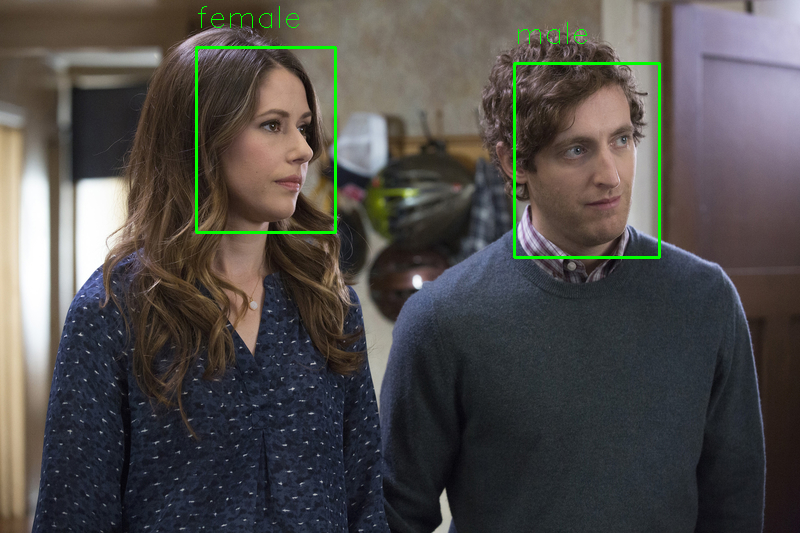

In [0]:
cv2_imshow(img)